<a href="https://colab.research.google.com/github/imdressel/project_gss17/blob/main/GSS_Isabella's_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/imdressel/project_gss17/

Cloning into 'project_gss17'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 105 (delta 36), reused 6 (delta 4), pack-reused 52
Receiving objects: 100% (105/105), 25.16 MiB | 22.64 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./project_gss17/gss_data_20182022_morevars.csv')

In [4]:
df.head()

,year,id,marital,hrs1,conrinc,childs,meovrwrk,hlthdep,age,sppres105plus,agekdbrn,sex
0,2018.0,1,never married,NaN,NaN,0.0,agree,NaN,43.0,NaN,NaN,male
1,2018.0,2,separated,NaN,NaN,3.0,NaN,NaN,74.0,NaN,21.0,female
2,2018.0,3,married,40.0,70100.0,2.0,disagree,NaN,42.0,50.0,35.0,male
3,2018.0,4,married,40.0,84120.0,2.0,neither agree nor disagree,NaN,63.0,79.0,32.0,female
4,2018.0,5,divorced,NaN,NaN,0.0,NaN,NaN,71.0,NaN,NaN,male


In [ ]:
meovrwrk = df['meovrwrk']
meovrwrk = meovrwrk.astype("string") # cast to string
print(meovrwrk.unique())
print(meovrwrk.dtype)

<StringArray>
[                     'agree',                         <NA>,
                   'disagree', 'neither agree nor disagree',
             'strongly agree',          'strongly disagree']
Length: 6, dtype: string
string


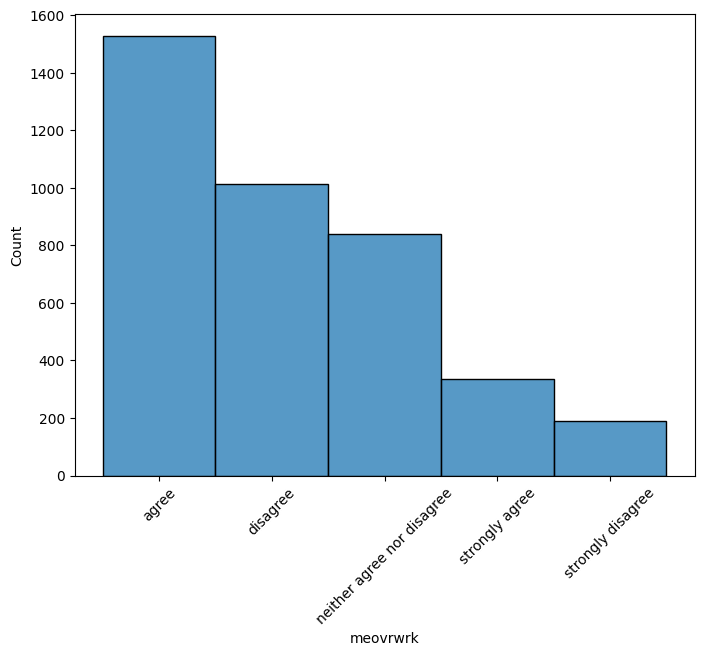

In [ ]:
plt.figure(figsize = (8,6))
sns.histplot(meovrwrk)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# assign cleaned data to original df
df['meovrwrk'] = meovrwrk

In [ ]:
df.head()

,year,id,marital,hrs1,conrinc,childs,meovrwrk,hlthdep
0,2018.0,1,never married,NaN,NaN,0.0,agree,NaN
1,2018.0,2,separated,NaN,NaN,3.0,<NA>,NaN
2,2018.0,3,married,40.0,70100.0,2.0,disagree,NaN
3,2018.0,4,married,40.0,84120.0,2.0,neither agree nor disagree,NaN
4,2018.0,5,divorced,NaN,NaN,0.0,<NA>,NaN


In [ ]:
# extract marital next
marital = df['marital']
print(marital.dtype)

object


In [ ]:
# cast to string
marital = marital.astype("string")
print(marital.unique())

<StringArray>
['never married', 'separated', 'married', 'divorced', 'widowed', <NA>]
Length: 6, dtype: string


In [ ]:
df['marital'] = marital

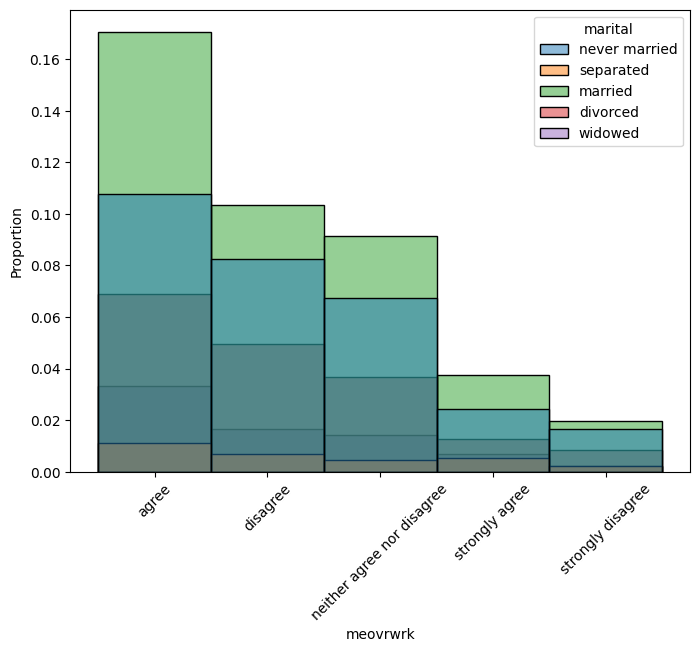

In [ ]:
## create grouped histplot
plt.figure(figsize=(8,6))
sns.histplot(data=df,x=meovrwrk,hue=marital,stat='proportion')
plt.xticks(rotation=45)
plt.show()

In [ ]:
pd.crosstab(df['marital'],df['meovrwrk'],margins=True)

meovrwrk,agree,disagree,neither agree nor disagree,strongly agree,strongly disagree,All
marital,,,,,,
divorced,268,193,143,49,32,685
married,665,403,356,146,77,1647
never married,420,321,263,94,64,1162
separated,43,26,18,20,8,115
widowed,129,65,56,26,9,285
All,1525,1008,836,335,190,3894


In [ ]:
pd.crosstab(df['marital'],df['meovrwrk'],margins=True,normalize=True)

meovrwrk,agree,disagree,neither agree nor disagree,strongly agree,strongly disagree,All
marital,,,,,,
divorced,0.068824,0.049563,0.036723,0.012583,0.008218,0.175912
married,0.170776,0.103493,0.091423,0.037494,0.019774,0.422958
never married,0.107858,0.082435,0.067540,0.024140,0.016436,0.298408
separated,0.011043,0.006677,0.004622,0.005136,0.002054,0.029533
widowed,0.033128,0.016692,0.014381,0.006677,0.002311,0.073190
All,0.391628,0.258860,0.214689,0.086030,0.048793,1.000000


see if we have enough data for like 2022 only

In [ ]:
df2022=df.where(df['year']==2022)

In [ ]:
df2022.describe()

,year,id,hrs1,conrinc,childs
count,3544.0,3544.000000,1938.000000,1990.000000,3533.000000
mean,2022.0,1772.535553,40.181631,42142.819586,1.737617
std,0.0,1023.268418,14.107341,40274.114699,1.669947
min,2022.0,1.000000,0.000000,336.000000,0.000000
25%,2022.0,886.750000,37.000000,14280.000000,0.000000
50%,2022.0,1772.500000,40.000000,30240.000000,2.000000
75%,2022.0,2658.250000,45.000000,55440.000000,3.000000
max,2022.0,3545.000000,89.000000,170912.582400,8.000000


In [ ]:
df2022

,year,id,marital,hrs1,conrinc,childs,meovrwrk
0,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>
1,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>
2,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>
3,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>
4,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>
...,...,...,...,...,...,...,...
42994,2022.0,3541.0,never married,48.0,NaN,0.0,neither agree nor disagree
42995,2022.0,3542.0,married,50.0,45360.0,2.0,neither agree nor disagree
42996,2022.0,3543.0,never married,38.0,55440.0,1.0,disagree
42997,2022.0,3544.0,married,40.0,45360.0,0.0,<NA>


testing out more stuff below

In [5]:
df = pd.read_csv('./project_gss17/gss_data_20182022_morevars.csv')

In [6]:
df.head()

,year,id,marital,hrs1,conrinc,childs,meovrwrk,hlthdep,age,sppres105plus,agekdbrn,sex
0,2018.0,1,never married,NaN,NaN,0.0,agree,NaN,43.0,NaN,NaN,male
1,2018.0,2,separated,NaN,NaN,3.0,NaN,NaN,74.0,NaN,21.0,female
2,2018.0,3,married,40.0,70100.0,2.0,disagree,NaN,42.0,50.0,35.0,male
3,2018.0,4,married,40.0,84120.0,2.0,neither agree nor disagree,NaN,63.0,79.0,32.0,female
4,2018.0,5,divorced,NaN,NaN,0.0,NaN,NaN,71.0,NaN,NaN,male


In [11]:
df['sex'] = df['sex'].astype("string") # cast to string
df['marital'] = df['marital'].astype("string") # cast to string
df['meovrwrk'] = df['meovrwrk'].astype("string") # cast to string
df['hlthdep'] = df['hlthdep'].astype("string") # cast to string

<Axes: xlabel='conrinc', ylabel='Density'>

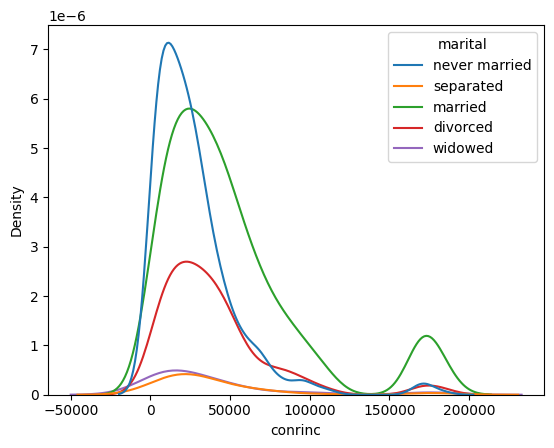

In [17]:
import seaborn as sns
sns.kdeplot(data=df,x='conrinc',hue='marital')

<Axes: xlabel='hrs1', ylabel='Density'>

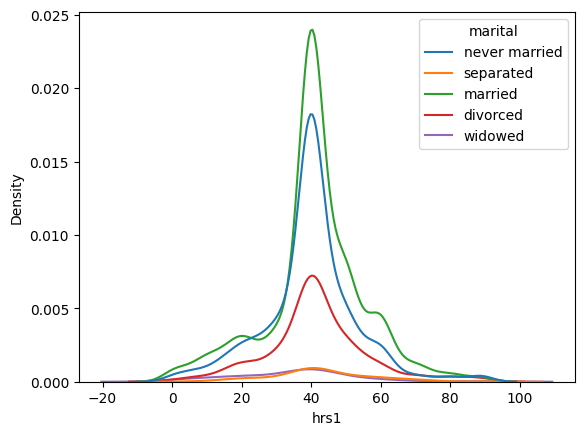

In [21]:
sns.kdeplot(data=df,x='hrs1',hue='marital')

<Axes: xlabel='agekdbrn', ylabel='Density'>

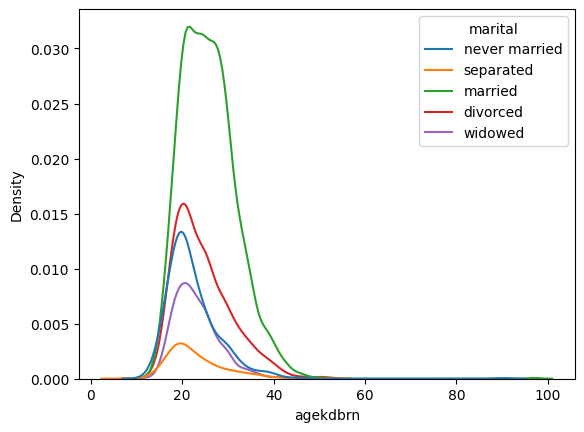

In [22]:
sns.kdeplot(data=df,x='agekdbrn',hue='marital')

<Axes: xlabel='agekdbrn', ylabel='Density'>

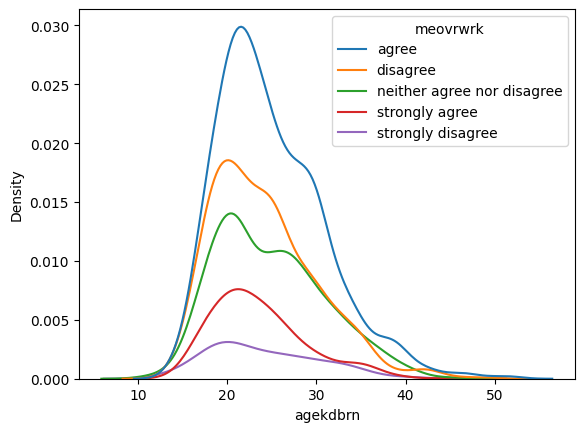

In [23]:
sns.kdeplot(data=df,x='agekdbrn',hue='meovrwrk')